# Exploring Uber and Lyft Prices in Boston

## Dominique Bradshaw


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utility.util import configure_plots
configure_plots()
#all of the things I think we could need here, hmm

The data comes from  Uber and Lyft in Boston, MA  from 11-26-2018 to 12-18-2018.How the information was obtained was not dsiclosed Our data has 693071 data points and 57 features. We have mostly non-catgeorical data types. The values of these features will depend on the data itself. For example, the "Trip date and time" feature may contain timestamps, while the "Pickup and drop-off locations" feature would have location data. Other features, like "Fare amount" and "Distance," would contain numerical values.The features consists of ID, time-related aspects(timestamp, hour, day, month, etc.) of the day, the settings of the day (temperatures, expected temperatures, tempMax, tempMin), locations, basically anything related to the settings of the day of the lyft/uber ride.


In [5]:
#Load raw data 
rideshare= pd.read_csv("./utility/data/rideshare_kaggle.csv")
# Exploring the data
features = rideshare.columns
print(features)
rideshare.head()

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
rideshare.count()

id                             693071
timestamp                      693071
hour                           693071
day                            693071
month                          693071
datetime                       693071
timezone                       693071
source                         693071
destination                    693071
cab_type                       693071
product_id                     693071
name                           693071
price                          637976
distance                       693071
surge_multiplier               693071
latitude                       693071
longitude                      693071
temperature                    693071
apparentTemperature            693071
short_summary                  693071
long_summary                   693071
precipIntensity                693071
precipProbability              693071
humidity                       693071
windSpeed                      693071
windGust                       693071
windGustTime

In [7]:
rideshare.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


 

### **Wait, is there something missing** That's right, let's check for missing values, in this case. Let's go ahead and drop them. If our dataset was signifcantly smaller, I would opt for imputing mean values.

Steps: We need to decide and categorize the kinds of data types, like between categorical and non-categorical and possbily what features we should not use due to ethical reasons 

In [8]:
# Check for missing values
missing_values = rideshare.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime         

In [9]:
# Handle missing values, in this case, we will drop them
#rideshare['price'].fillna(rideshare['price'].mean(), inplace=True)
rideshare.dropna(subset=['price'], inplace=True)

In [10]:
# Remove duplicates
rideshare.drop_duplicates(inplace=True)

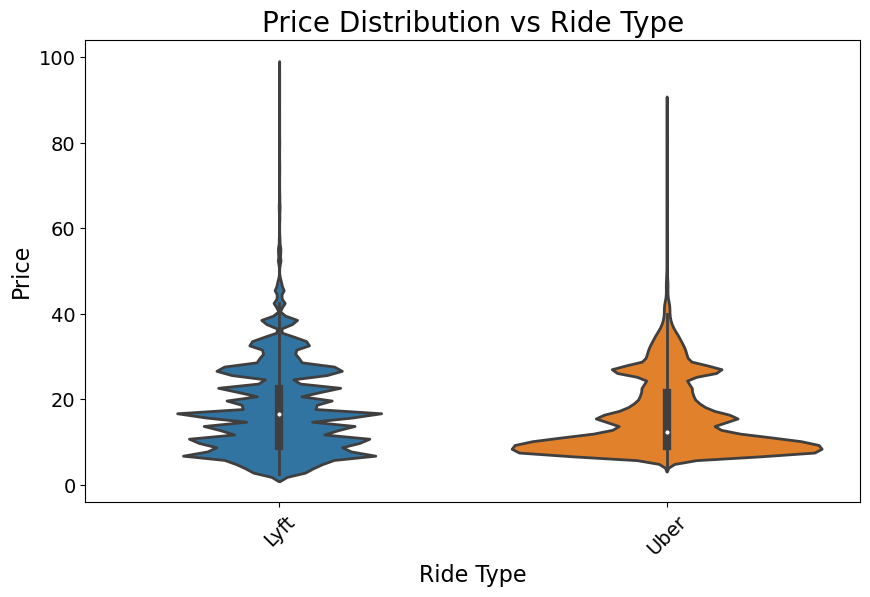

In [11]:
# Price Distribution by Ride Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=rideshare, x='cab_type', y='price')
plt.xlabel('Ride Type')
plt.ylabel('Price')
plt.title('Price Distribution vs Ride Type')
plt.xticks(rotation=45)
plt.show()


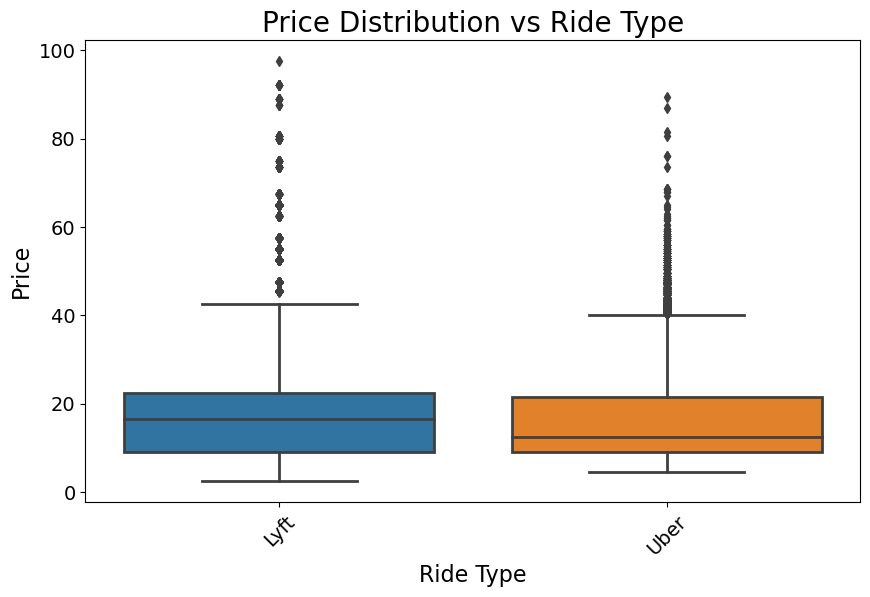

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rideshare, x='cab_type', y='price')
plt.xlabel('Ride Type')
plt.ylabel('Price')
plt.title('Price Distribution vs Ride Type')
plt.xticks(rotation=45)
plt.show()

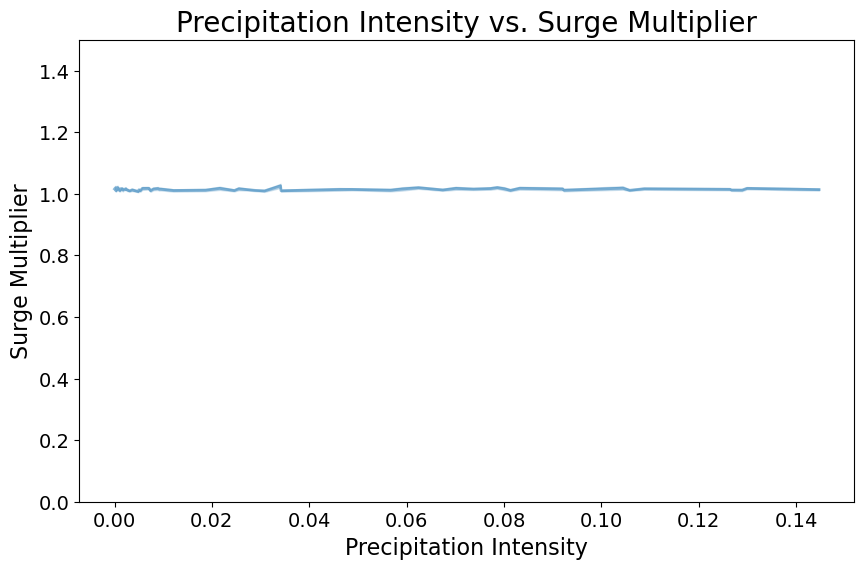

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rideshare, x='precipIntensity', y='surge_multiplier', alpha=0.5)
plt.xlabel('Precipitation Intensity')
plt.ylabel('Surge Multiplier')
plt.title('Precipitation Intensity vs. Surge Multiplier')
plt.ylim(0, 1.5)
plt.show()

## Hypothesis: Uber fares are expected to consistently exhibit a more cost-effective pricing structure in comparison to Lyft fares, irrespective of environmental variables such as weather conditions and time of day or month.

Our research focus is oriented towards the examination of pricing disparities inherent to each ride-sharing service, stemming from factors such as quality, operational policies, and associated fees.

Our empirical analysis will discern the overall pricing discrepancies across the spectrum of ride-sharing services, independent of the influences of factors such as distance, meteorological conditions, and temporal considerations. This, in turn, will enable us to provide discerning customers with insights into the underlying determinants of price differentiation, empowering them to make informed choices in accordance with their budgetary preferences.

# Let's Work With This Hypothesis, HMM, was it on par?

In [21]:
uber_data = rideshare[rideshare['cab_type'] == 'Uber']
lyft_data = rideshare[rideshare['cab_type'] == 'Lyft']

X_uber = uber_data[['distance', 'temperature', 'humidity']]
y_uber = uber_data['price']
X_uber_train, X_uber_test, y_uber_train, y_uber_test = train_test_split(X_uber, y_uber, test_size=0.3, random_state=11)

X_lyft = lyft_data[['distance', 'temperature', 'humidity']]
y_lyft = lyft_data['price']
X_lyft_train, X_lyft_test, y_lyft_train, y_lyft_test = train_test_split(X_lyft, y_lyft, test_size=0.3, random_state=11)

average_price_uber = np.mean(y_uber_train)
average_price_lyft = np.mean(y_lyft_train)
print(average_price_uber)
print(average_price_lyft)

15.786159716850262
17.360470200060416


# Let's try a super basic Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

uber_model = LinearRegression()
lyft_model = LinearRegression()

uber_model.fit(X_uber_train, y_uber_train)
lyft_model.fit(X_lyft_train, y_lyft_train)

uber_predictions = uber_model.predict(X_uber_test)
lyft_predictions = lyft_model.predict(X_lyft_test)

uber_mae = mean_absolute_error(y_uber_test, uber_predictions)
lyft_mae = mean_absolute_error(y_lyft_test, lyft_predictions)

uber_mse = mean_squared_error(y_uber_test, uber_predictions)
lyft_mse = mean_squared_error(y_lyft_test, lyft_predictions)

uber_r2 = r2_score(y_uber_test, uber_predictions)
lyft_r2 = r2_score(y_lyft_test, lyft_predictions)

print("Uber Model:")
print(f"Mean Absolute Error: {uber_mae:.2f}")
print(f"Mean Squared Error: {uber_mse:.2f}")
print(f"R-squared (R2): {uber_r2:.2f}")

print("\nLyft Model:")
print(f"Mean Absolute Error: {lyft_mae:.2f}")
print(f"Mean Squared Error: {lyft_mse:.2f}")
print(f"R-squared (R2): {lyft_r2:.2f}")

Uber Model:
Mean Absolute Error: 6.69
Mean Squared Error: 64.96
R-squared (R2): 0.11

Lyft Model:
Mean Absolute Error: 7.39
Mean Squared Error: 86.87
R-squared (R2): 0.13


# Now Let's Try a Decision Tree, linear might not be a good fit :(

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Decision Tree model for Uber
uber_tree = DecisionTreeRegressor(random_state=11)
uber_tree.fit(X_uber_train, y_uber_train)

# Predict and evaluate Uber model
uber_tree_predictions = uber_tree.predict(X_uber_test)
print("Uber Decision Tree MAE:", mean_absolute_error(y_uber_test, uber_tree_predictions))
print("Uber Decision Tree MSE:", mean_squared_error(y_uber_test, uber_tree_predictions))
print("Uber Decision Tree R2:", r2_score(y_uber_test, uber_tree_predictions))

# Train the Decision Tree model for Lyft
lyft_tree = DecisionTreeRegressor(random_state=11)
lyft_tree.fit(X_lyft_train, y_lyft_train)

# Predict and evaluate Lyft model
lyft_tree_predictions = lyft_tree.predict(X_lyft_test)
print("Lyft Decision Tree MAE:", mean_absolute_error(y_lyft_test, lyft_tree_predictions))
print("Lyft Decision Tree MSE:", mean_squared_error(y_lyft_test, lyft_tree_predictions))
print("Lyft Decision Tree R2:", r2_score(y_lyft_test, lyft_tree_predictions))


Uber Decision Tree MAE: 7.374455450793576
Uber Decision Tree MSE: 83.06448101134269
Uber Decision Tree R2: -0.1363624735821638
Lyft Decision Tree MAE: 8.8780511554764
Lyft Decision Tree MSE: 125.58230640357647
Lyft Decision Tree R2: -0.2557558320732942


# This is still pretty bad, but with more practice (with your help). I could create wonderful models and strengthen my skills. Thank you for taking the time to look at my project.

The average price of Uber in relation to distance is $15.77 where as the average price of Lyft in relation to distance is $17.36. There is a $1.59 price difference between the two cabs. While this may seem indifferent to some customers, for customers who use the transportation services regularly, this price adds up. In a day, that is an additional $3.18 for one ride back and forth, $6.36 for two rides back an forth. In a week, $22.26 for one ride back and forth each day, $44.52 for two rides back and forth each day. In a month, around $95 for one ride back and forth for 30 days, around $190 for two rides back and forth for 30 days. The price adds up and for areas where many people do not own cars such as Chicago, New York, and other big cities, in addition to the high cost of living, customers would be interested in spending less.

Also, from Uber's dataset, there is a lower Mean Absolute Error of 6.69 than Lyft's dataset in which the Mean Absolute Error is 7.39. Therefore, the machine learning model for Uber has less errors than the machine learning model for Lyft.

Uber has a smaller Mean Squared Error of 64.96 in comparison to Lyft's Mean Squared Error of 86.86. This means that Uber's estimates are closer to the actual values than Lyft's, supporting the idea that Uber's prices are better than Lyft's.

Surprisingly, the Lyft regression model fits the data better and has a better performance with 0.13 in comparison to Uber's regression model fo 0.11. Although this may indicate a better fit, both values are fairly low, leaving a conclusion that the model may not actually explain any of the variability in the dependent variables. Also, a low R-squared could indicate that the model may not actually be a good fit for the data.


### Ethical Issues, Who Holds Stake?

Stakeholders: The manufacturers of the models that calculate the prices for riders/customers are stakeholders that do the affecting. The drivers/employees are affected by the model/app as the prices may determine how many rides they give in a day, affecting their wages. The riders/customers are affected by the prices of the rides as well as the actual experience of the rides. If drivers aren't being paid a livable wage, there will be a decrease in supply and an increase in demand in which there will be less drivers and a disproportionate amount of riders/customers to each driver.
 
Impacted by ethical issues: One of the ethical issues is the surging prices of the services. With the reliance on transportation systems in big cities, especially New York, surging prices can seem exploitative as other transportation systems (trains, buses, etc.) usually have fixed prices. With the surging of prices and need for transportation in big cities where most citizens don't have cars and high traffic, high prices/price surges may seem like companies like Lyft with higher prices are taking advantage of its customers.

Resolution: A resolution to the exploitation of prices is to set a fixed price for distance as well as a fixed price for time of day. Also, if companies consult each other rather than focusing on beating competition. This would demostrate fairer practices, which would increase the demand of their transportation services.

# Future Improvements

The features that were helpful were source, destination, distance (needed source and destination to get the distance), cab type, and price were informative in our analysis of relationships as we rarely found meaningful relationships between weather (precipitation, UVIndex, visibility, wind, temperature, etc.). Features that were not informative were features related to weather, sunrise, sunset, moonphase, temperature, etc.) because of the lack of relationships that we found with prices, price surges, and more. it would be helpful to have the volume of rides for each day, week, and month so we can determine if there is a relationship between the non-informative features as well as the informative features to see if the volume of rides are affected in any way.